In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
from lightgbm import LGBMRegressor
import math
import cv2

In [47]:
df_data = jb.load('df_data.pkl.z')
df_data

,x,y,z,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7
14,233,1130,3.195862,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,1.162614,1.094573,0.419775,0.302256,-0.152982,23.382784
15,233,1131,3.273030,0.1199,0.0880,0.0668,0.0457,0.0490,0.0316,0.0283,0.0237,1.171434,1.099318,0.419775,0.316380,-0.153713,23.382784
16,233,1132,3.299687,0.1199,0.0879,0.0666,0.0461,0.0488,0.0324,0.0281,0.0238,1.168473,1.096035,0.421458,0.311940,-0.154246,23.158824
17,233,1133,3.268182,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,1.175411,1.111754,0.421458,0.322339,-0.172881,23.158824
18,233,1134,3.278125,0.1196,0.0884,0.0677,0.0454,0.0489,0.0323,0.0285,0.0238,1.174645,1.104724,0.419585,0.321375,-0.161235,23.607309
19,233,1135,3.294375,0.1196,0.0866,0.0687,0.0451,0.0489,0.0323,0.0285,0.0229,1.171288,1.110496,0.419585,0.315110,-0.168367,23.607309
20,233,1136,3.353030,0.1196,0.0868,0.0674,0.0451,0.0485,0.0317,0.0296,0.0232,1.171894,1.105480,0.422963,0.316149,-0.163072,24.852202
21,233,1137,3.381500,0.1196,0.0886,0.0660,0.0451,0.0485,0.0317,0.0296,0.0233,1.177283,1.099970,0.422963,0.325355,-0.152838,24.852202
23,234,1003,2.230000,0.1224,0.0917,0.0725,0.0509,0.0554,0.0345,0.0331,0.0264,1.149791,1.090009,0.376828,0.286115,-0.133698,28.922021
24,234,1004,2.229857,0.1224,0.0917,0.0734,0.0514,0.0540,0.0336,0.0323,0.0264,1.146938,1.090436,0.387755,0.281621,-0.152276,27.977559


In [48]:
lgbm = jb.load('trained_model_baseline.pkl.z')
mdl = jb.load('trained_model_boost.pkl.z')

In [49]:
z = lgbm.predict(df_data.drop(['x','y','z'],axis=1))

In [51]:
df_data['z_pred'] = z

In [52]:
df_result = df_data.drop(['b1','b2','b3','b4','b5','b6','b7','b8','b2b4','b3b4','ndwi15','ndwi24','ndwi53','cspmb7'],axis=1)

In [53]:
df_result['error_abs'] = abs(df_result['z'] - df_result['z_pred'])

In [54]:
df_result['error_dif'] = df_result['z_pred'] - df_result['z']

In [55]:
df_result['z_mean_rd'] = df_result['z'].apply(np.floor)

In [56]:
df_depth = df_result.drop(['x','y','z_pred','z'],axis=1).groupby('z_mean_rd').mean().reset_index()
df_depth.columns = ['depth_round_down','mean_abs_error','mean_dif_error']
df_depth

,depth_round_down,mean_abs_error,mean_dif_error
0,1.0,1.234296,1.125198
1,2.0,1.093508,0.970824
2,3.0,1.029480,0.794521
3,4.0,0.921469,0.603341
4,5.0,0.903743,0.259526
5,6.0,1.081946,0.016906
6,7.0,1.055635,-0.147261
7,8.0,1.023782,-0.187152
8,9.0,1.192028,-0.570714
9,10.0,1.394801,-0.775284


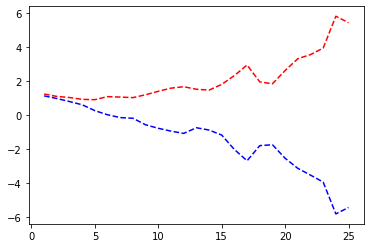

In [57]:
plt.plot(df_depth['depth_round_down'], df_depth['mean_abs_error'], 'r--', df_depth['depth_round_down'], df_depth['mean_dif_error'], 'b--',)
plt.show()

In [84]:
df_result.describe()

,x,y,z,z_pred,error_abs,error_dif,z_mean_rd
count,18952.000000,18952.000000,18952.000000,18952.000000,18952.000000,18952.000000,18952.000000
mean,1126.827037,655.660669,7.264115,7.270071,1.221779,0.005956,6.765777
std,451.646854,404.657476,4.536674,3.991213,1.349403,1.820350,4.554499
min,233.000000,0.000000,1.164255,-1.514872,0.000018,-16.042666,1.000000
25%,779.000000,341.000000,3.498085,4.208197,0.341837,-0.738738,3.000000
50%,1023.000000,608.500000,6.310199,6.403443,0.801662,0.063092,6.000000
75%,1508.000000,946.000000,9.845040,9.313436,1.613243,0.854249,9.000000
max,2093.000000,1638.000000,25.792759,25.617888,16.042666,12.282264,25.000000


In [140]:
def find_transect(x_s,y_s,x_e,y_e,df):
    transect = list()
    angle = math.atan2(y_s-y_e, x_s-x_e)
    low_x, high_x = (x_s, x_e) if x_s < x_e else (x_e, x_s)
    low_y, high_y = (y_s, y_e) if y_s < y_e else (y_e, y_s)
    df_t = df[(df['x'] >= low_x) & (df['x'] <= high_x)]
    df_t = df_t[(df_t['y'] >= low_y) & (df_t['y'] <= high_y)]
    for i, row in enumerate(df_t.itertuples()):
        x = row[1]
        y = row[2]
        angle2 = math.atan2(y-y_e,x-x_e)
        if abs(angle2 - angle) < 0.05:
            transect.append([x,y])
    return transect
    

In [141]:
image = cv2.imread('../data/generated/rgb_image.jpg')

In [142]:
image_cp = image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = row[1]
    y = row[2]
    image_cp[y][x] = [255,255,255]
cv2.imwrite('../data/generated/bat_transects_image.jpg',image_cp)

True

In [145]:
transect = find_transect(510,410,680,310,df_data)

In [146]:
for i, row in enumerate(transect):
    x = row[0]
    y = row[1]
    image_cp[y][x] = [0,255,0]
cv2.imwrite('../data/generated/bat_single_transect_image.jpg',image_cp)

True